<a href="https://colab.research.google.com/github/manabil/Tensorflow-Advanced-Techniques-Specialization/blob/main/Custom%20and%20Distributed%20Training%20with%20Tensorflow/Week%201/C2_W2_Lab_1_training_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Training Basics

In this ungraded lab you'll gain a basic understanding of building custom training loops.
- It takes you through the underlying logic of fitting any model to a set of inputs and outputs.
- You will be training your model on the linear equation for a straight line, wx + b.
- You will implement basic linear regression from scratch using gradient tape.
- You will try to minimize the loss incurred by the model using linear regression.

## Imports

In [1]:
from __future__ import absolute_import, division, print_function
from __future__ import unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


import tensorflow as tf
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Define Model

You define your model as a class.
- `x` is your input tensor.
- The model should output values of **wx+b**.
- You'll start off by initializing w and b to random values.
- During the training process, values of w and b get updated in accordance with linear regression so as to minimize the loss incurred by the model.
- Once you arrive at optimal values for w and b, the model would have been trained to correctly predict the values of wx+b.

Hence,
- **w** and **b** are trainable weights of the model.
- **x** is the input
- **y** = wx + b is the output

In [2]:
class Model():
  def __init__(self):
    # Initialize the weights to `2.0` and the bias to `1.0`
    # In practice, these should be initialized to random values (for example,
    # with `tf.random.normal`)
    self.w: tf.Variable = tf.Variable(2.0)
    self.b: tf.Variable = tf.Variable(1.0)

  def __call__(self, x: tf.Tensor) -> tf.Tensor:
    return tf.multiply(self.w, x) + self.b

model: Model = Model()

### Define a loss function

A loss function measures how well the output of a model for a given input matches the target output.
- The goal is to minimize this difference during training.
- Let's use the standard L2 loss, also known as the least square errors
$$Loss = \sum_{i} \left (y_{pred}^i - y_{target}^i \right )^2$$

In [3]:
def loss(predicted_y: tf.Tensor, target_y: tf.Tensor) -> tf.Tensor:
  return tf.reduce_mean(tf.square(tf.subtract(predicted_y, target_y)))

### Obtain training data

First, synthesize the training data using the "true" w and "true" b.

$$y = w_{true} \times x + b_{true} $$

In [4]:
TRUE_w: float = 9.0
TRUE_b: float = 4.5
NUM_EXAMPLES: int = 1000

xs: tf.Tensor  = tf.random.normal(shape=[NUM_EXAMPLES])

ys: tf.Tensor = tf.multiply(TRUE_w, xs) + TRUE_b

Before training the model, visualize the loss value by plotting the model's predictions in red crosses and the training data in blue dots:

In [5]:
def plot_data(
    inputs: tf.Tensor, outputs: tf.Tensor, predicted_outputs: tf.Tensor
) -> None:
  real: object = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted: object = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
  plt.show()

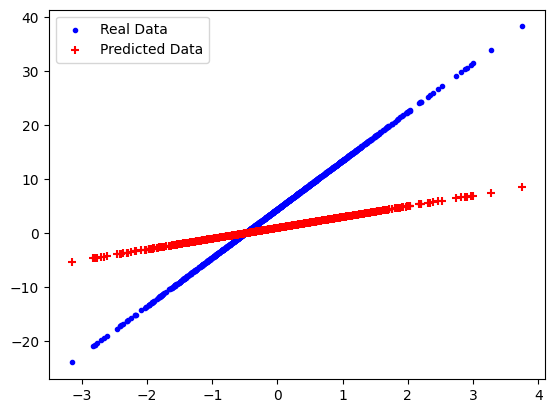

Current loss: 61.087559


In [6]:
plot_data(xs, ys, model(xs))
print(f'Current loss: {loss(model(xs), ys).numpy():.6f}')

### Define a training loop

With the network and training data, train the model using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)
- Gradient descent updates the trainable weights **w** and **b** to reduce the loss.


There are many variants of the gradient descent scheme that are captured in `tf.train.Optimizer`—our recommended implementation. In the spirit of building from first principles, here you will implement the basic math yourself.
- You'll use `tf.GradientTape` for automatic differentiation
- Use `tf.assign_sub` for decrementing a value.  Note that assign_sub combines `tf.assign` and `tf.sub`

In [7]:
def train(
    model: Model, inputs: tf.Tensor, outputs: tf.Tensor, learning_rate: float
) -> tf.Tensor:
  with tf.GradientTape() as t:
    current_loss: tf.Tensor = loss(model(inputs), outputs)
  dw: tf.Tensor
  db: tf.Tensor
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(tf.multiply(learning_rate, dw))
  model.b.assign_sub(tf.multiply(learning_rate, db))

  return current_loss

Finally, you can iteratively run through the training data and see how `w` and `b` evolve.

In [8]:
model: Model = Model()

# Collect the history of W-values and b-values to plot later
list_w: list
list_b: list
list_w, list_b = [], []
epochs: range = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss: tf.Tensor = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print(f'Epoch {epoch:2d}: w={list_w[-1]:.2f} b={list_b[-1]:.2f}, \
  loss={current_loss:.5f}')


Epoch  0: w=2.00 b=1.00,   loss=61.08756
Epoch  1: w=3.41 b=1.67,   loss=39.14275
Epoch  2: w=4.53 b=2.22,   loss=25.08321
Epoch  3: w=5.43 b=2.66,   loss=16.07487
Epoch  4: w=6.15 b=3.01,   loss=10.30254
Epoch  5: w=6.72 b=3.30,   loss=6.60349
Epoch  6: w=7.18 b=3.53,   loss=4.23286
Epoch  7: w=7.55 b=3.72,   loss=2.71347
Epoch  8: w=7.84 b=3.87,   loss=1.73960
Epoch  9: w=8.07 b=3.99,   loss=1.11533
Epoch 10: w=8.26 b=4.09,   loss=0.71513
Epoch 11: w=8.41 b=4.17,   loss=0.45856
Epoch 12: w=8.53 b=4.23,   loss=0.29407
Epoch 13: w=8.62 b=4.28,   loss=0.18859
Epoch 14: w=8.70 b=4.33,   loss=0.12095


In addition to the values for losses, you also plot the progression of trainable variables over epochs.

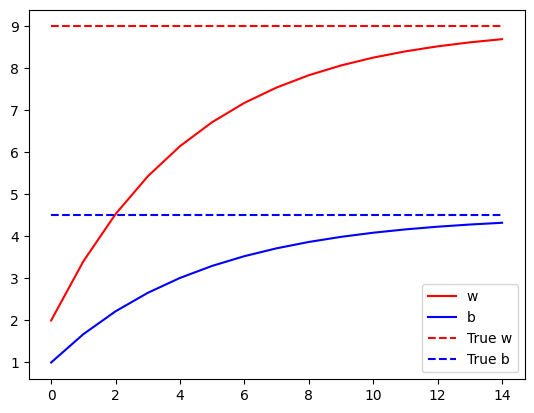

In [9]:
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

## Plots for Evaluation
Now you can plot the actual outputs in red and the model's predictions in blue on a set of random test examples.

You can see that the model is able to make predictions on the test set fairly accurately.

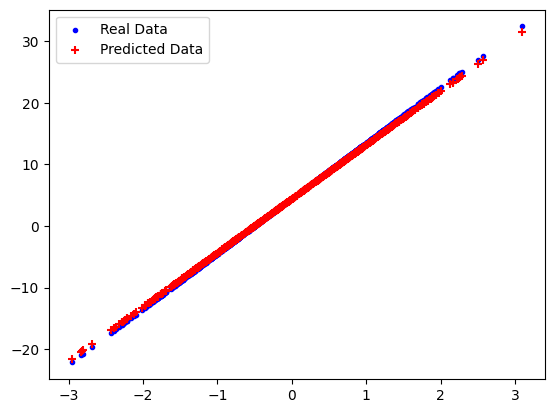

In [10]:
test_inputs: tf.Tensor = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs: tf.Tensor = tf.multiply(test_inputs, TRUE_w) + TRUE_b

predicted_test_outputs: tf.Tensor = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

Visualize the cost function against the values of each of the trainable weights the model approximated to over time.

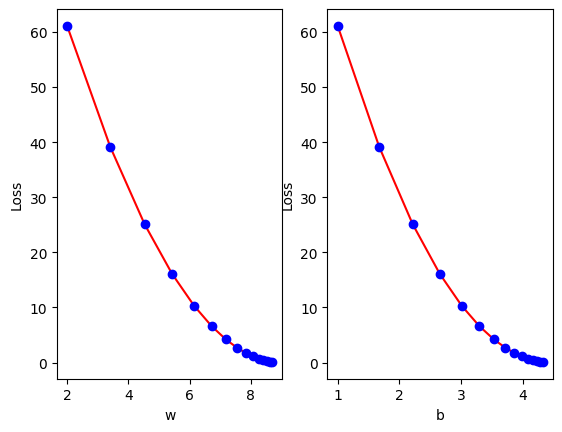

In [11]:
def plot_loss_for_weights(weights_list: list, losses: list) -> None:
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')


weights_list = [
    {'name': "w", 'values': list_w},
    {'name': "b", 'values': list_b}
]

plot_loss_for_weights(weights_list, losses)